Welcome to our project on OTT platforms where we will be building a recommendation system using data from Kaggle. We will be exploring the top streaming services, including <b>Amazon Prime Video, Apple TV, Disney, HBO Max, Hulu, Netflix, and Paramount Plus.</b> Our primary goal is to develop a recommendation system that will help users find new content they will enjoy on these platforms. We hope you enjoy reading through our project and learn more about the fascinating world of OTT platforms and recommendation systems.<br>

Let us know if you have any questions about the project or any of the subtopics covered.

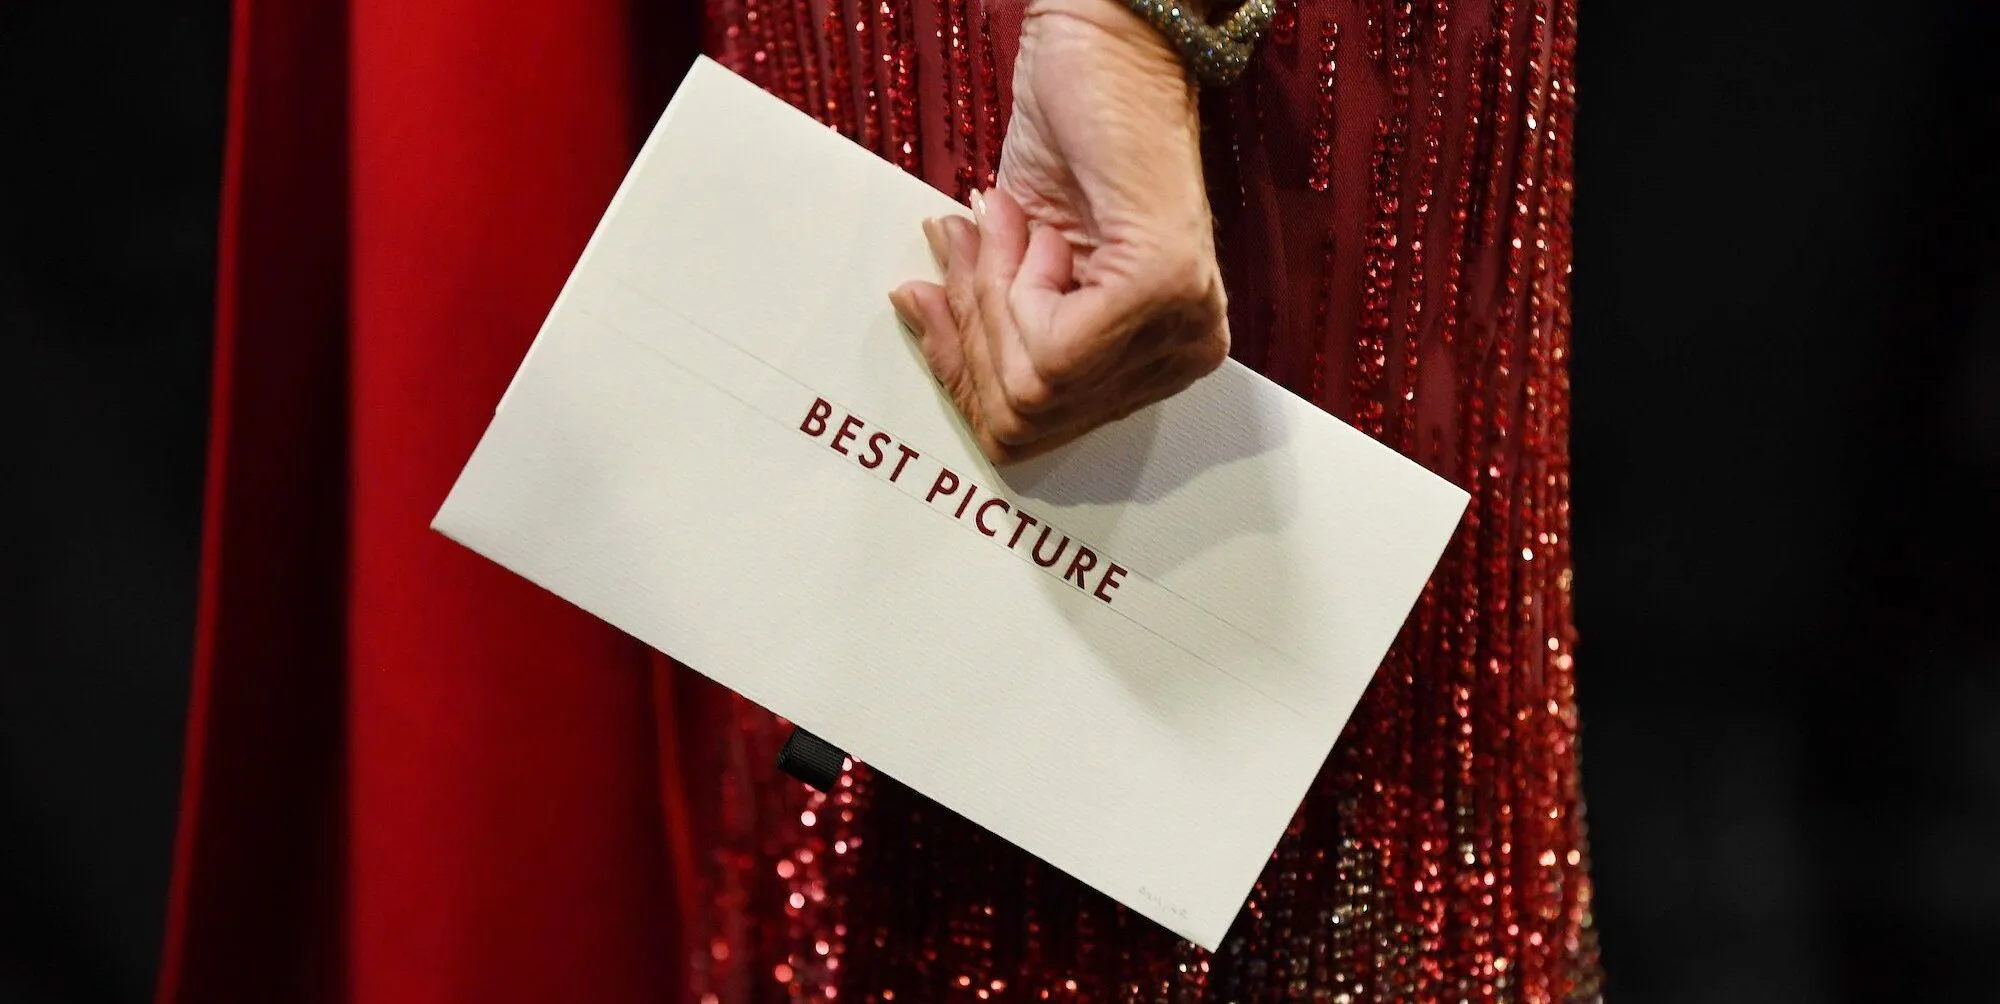

<b>For the dataset:<br></b>
Amazon Prime Video: https://www.kaggle.com/datasets/dgoenrique/amazon-prime-movies-and-tv-shows <br>
Apple TV: https://www.kaggle.com/datasets/dgoenrique/apple-tv-movies-and-tv-shows <br>
Disney: https://www.kaggle.com/datasets/dgoenrique/disney-movies-and-tv-shows<br>
HBO: https://www.kaggle.com/datasets/dgoenrique/hbo-max-movies-and-tv-shows<br>
Netflix: https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows<br>
Paramount: https://www.kaggle.com/datasets/dgoenrique/paramount-movies-and-tv-shows<br>
Hulu: https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

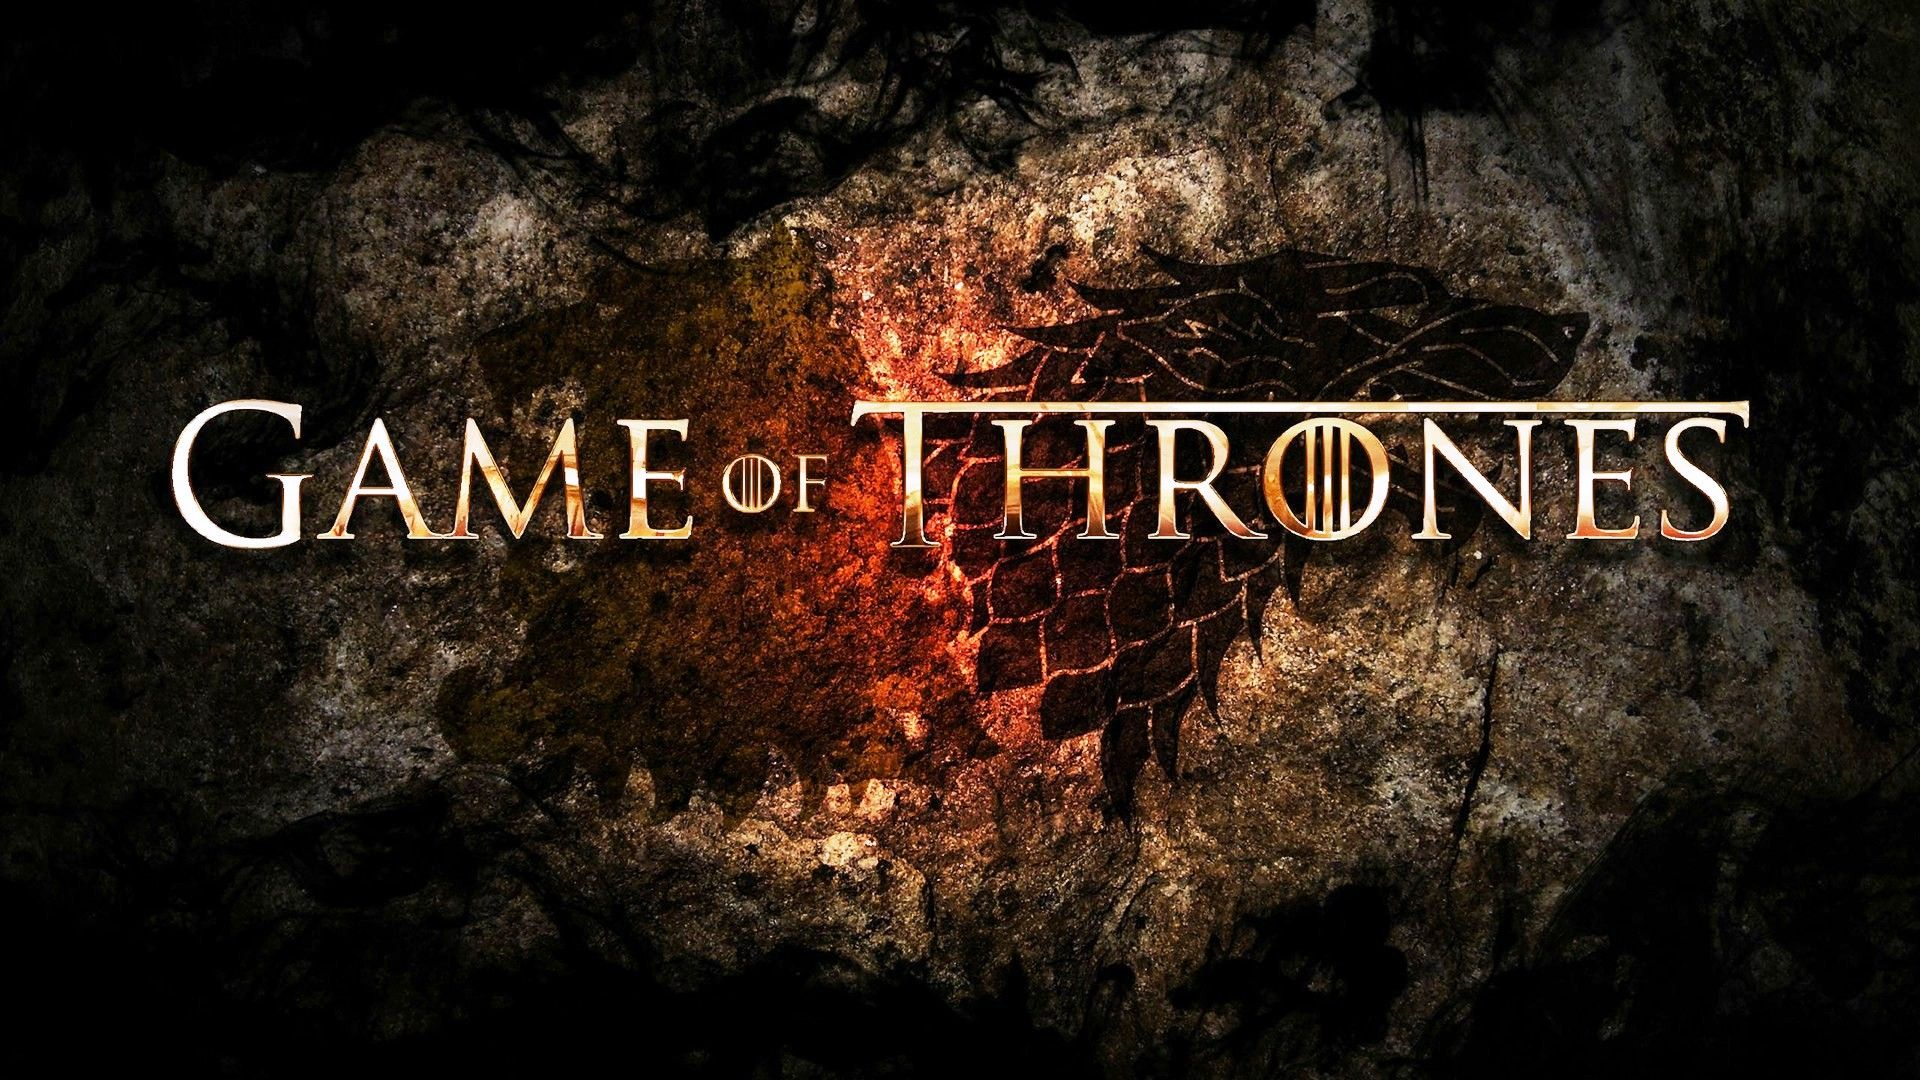

Since the analysis is all about movies and shows on various platform, as long as we are not doing platform specific analysis we will be following, what better color scheme to follow other than the Oscars. 	<br>

In [2]:
amazon_credits = pd.read_csv('amazon_credits.csv')
amazon_titles = pd.read_csv('amazon_titles.csv')
apple_credits = pd.read_csv('apple_credits.csv')
apple_titles = pd.read_csv('apple_titles.csv')
disney_credits = pd.read_csv('disney_credits.csv')
disney_titles = pd.read_csv('disney_titles.csv')
hbo_credits = pd.read_csv('hbo_credits.csv')
hbo_titles = pd.read_csv('hbo_titles.csv')
netflix_credits = pd.read_csv('netflix_credits.csv')
netflix_titles = pd.read_csv('netflix_titles.csv')
paramount_credits = pd.read_csv('paramount_credits.csv')
paramount_titles = pd.read_csv('paramount_titles.csv')

In [3]:
hulu_titles = pd.read_csv('hulu_titles.csv')

*Please note the data for Hulu is not the same as the data for the rest of the platforms. We do not have imdb/tmdb scores, popularity or votes. Hence, data for Hulu is only used for visualization purpose*

In [4]:
amazon_titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357


In [5]:
hulu_titles.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."


In [6]:
paramount_titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [7]:
ott_content = pd.concat([amazon_titles,apple_titles,disney_titles,hbo_titles,netflix_titles,paramount_titles],axis = 0)

In [8]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


In [9]:
ott_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25246 entries, 0 to 3181
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25246 non-null  object 
 1   title                 25246 non-null  object 
 2   type                  25246 non-null  object 
 3   description           25050 non-null  object 
 4   release_year          25246 non-null  int64  
 5   age_certification     12097 non-null  object 
 6   runtime               25246 non-null  int64  
 7   genres                25246 non-null  object 
 8   production_countries  25246 non-null  object 
 9   seasons               5791 non-null   float64
 10  imdb_id               23260 non-null  object 
 11  imdb_score            22646 non-null  float64
 12  imdb_votes            22586 non-null  float64
 13  tmdb_popularity       24519 non-null  float64
 14  tmdb_score            22109 non-null  float64
dtypes: float64(5), int64

In [10]:
# checking if rows have got duplicated during concatenation 
ott_content[ott_content.duplicated() == True].shape

(1884, 15)

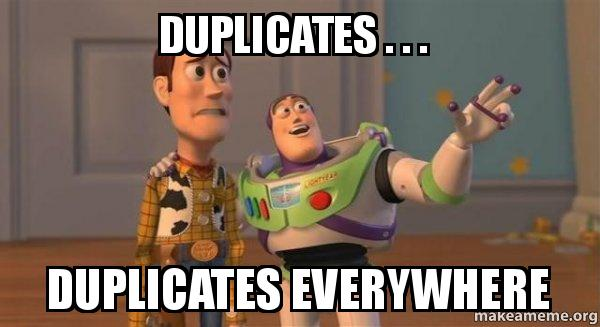

1884 rows have got duplicated while combining data from all platforms. Hence, remove duplicated rows.

In [11]:
ott_content = ott_content.drop_duplicates()

In [12]:
ott_content[ott_content.duplicated() == True].shape

(0, 15)

Hurray! We have successfully removed all duplicate values. What about missing values or null values?

In [13]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


In [14]:
def null_rate_fn(ott_content):
    for i in ott_content.columns:
        null_rate = ott_content[i].isna().sum()/ len(ott_content) *100
        if null_rate > 0:
            print("{} null rate is {}%".format(i,round(null_rate,2)))

In [15]:
null_rate_fn(ott_content)

description null rate is 0.83%
age_certification null rate is 51.28%
seasons null rate is 75.93%
imdb_id null rate is 8.35%
imdb_score null rate is 10.95%
imdb_votes null rate is 11.21%
tmdb_popularity null rate is 3.08%
tmdb_score null rate is 12.84%


Seasons has the highest missing data and that is because the data for TV Shows and Movies has been combined into one. Next in line is, ratings/age certification that has the second highest missing data. We will not be using imdb_id in our analysis so we could safely eleminate that column. rest of the values we need, so we'll be keeping those.

In [16]:
ott_content[ott_content['seasons'].isna()].shape

(17739, 15)

Phew! That's a huge number. Let's check that for all the rows that have NaN value for seasons are only those rows where the type of content is a MOVIE. If true, for all those rows we could put the value of seasons as 0 (because movies do not have seasons)

In [17]:
len(ott_content.loc[ott_content['seasons'].isna() & (ott_content['type'] == 'MOVIE')]) == ott_content.seasons.isna().sum()

True

In [18]:
ott_content['seasons'].fillna(0,inplace = True)

In [19]:
ott_content.sample()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5927,tm1110241,Kaaval,MOVIE,Thampan and Antony are a long time best friend...,2021,NaN,148,"['action', 'thriller', 'drama']",['IN'],0.0,tt11182984,5.2,1553.0,2.316,4.4


In [20]:
ott_content.genres.value_counts()

['documentation']                                                  1879
['comedy']                                                         1726
['drama']                                                          1593
['drama', 'romance']                                                431
['drama', 'comedy']                                                 383
                                                                   ... 
['comedy', 'romance', 'drama', 'fantasy']                             1
['drama', 'war', 'action', 'history']                                 1
['drama', 'sport', 'crime']                                           1
['crime', 'comedy', 'romance']                                        1
['action', 'fantasy', 'comedy', 'drama', 'romance', 'thriller']       1
Name: genres, Length: 4485, dtype: int64

In [21]:
ott_content.production_countries.value_counts()

['US']                            11984
['IN']                             1769
['GB']                             1220
[]                                 1049
['CA']                              562
                                  ...  
['DE', 'RU', 'US']                    1
['HU', 'GB', 'PH']                    1
['CL', 'NL', 'AR', 'BR', 'QA']        1
['PR', 'MX']                          1
['US', 'KH', 'PK', 'GB']              1
Name: production_countries, Length: 1034, dtype: int64

In [22]:
# ott_content[['first_genre','second_genre']] = ott_content['genres'].apply(lambda x:x[:2]).apply(pd.Series)
# ValueError: Columns must be same length as key
# since the length of the genres column varies

In [23]:
# ott_content['first_genre'] = ott_content['genres'].apply(lambda x:x[:1])
# ott_content['second_genre'] = ott_content['genres'].apply(lambda x:x[1] if len(x)>1 else None) 
# the resultant df gives you the first_genre  - [ and second_genre - '
# hence we need to strip all the characters, keep only the genres in the list then use the apply function

In [24]:
ott_content['genres'] = ott_content['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_1204/1032821507.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ott_content['genres'] = ott_content['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')


In [25]:
ott_content['production_countries'] = ott_content['production_countries'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')

/var/folders/kd/vczjh0f55158sc6lflbyfd4w0000gn/T/ipykernel_1204/921581271.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ott_content['production_countries'] = ott_content['production_countries'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')


In [26]:
ott_content.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama, family, fantasy, romance, comedy",US,0.0,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"comedy, war",US,0.0,tt0023969,7.8,60933.0,9.013,7.357


In [27]:
ott_content['genre'] = ott_content['genres'].str.split(',').str[0]
ott_content['production_country'] = ott_content['production_countries'].str.split(',').str[0]

In [28]:
ott_content.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama, family, fantasy, romance, comedy",US,0.0,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"comedy, war",US,0.0,tt0023969,7.8,60933.0,9.013,7.357,comedy,US


In [29]:
ott_content.drop(columns = ['imdb_id','genres','production_countries'], inplace = True, axis = 1)

In [30]:
ott_content.head(2)

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,7.8,60933.0,9.013,7.357,comedy,US


In [31]:
null_rate_fn(ott_content)

description null rate is 0.83%
age_certification null rate is 51.28%
imdb_score null rate is 10.95%
imdb_votes null rate is 11.21%
tmdb_popularity null rate is 3.08%
tmdb_score null rate is 12.84%


50% of age certification values are Nan. However, for the rest of the attributes that contain Nan values, we only need them for thr recommendation system and not the analysis or visualization. Hence, for now, lets keep it the way it is. 

Appending the name of the streaming platform that are streaming the particular content.

In [32]:
lt = []

for i in ott_content['id']:
    platform = []
    if i in amazon_titles['id'].values:
        platform.append('amazon_prime_video')
    if i in apple_titles['id'].values:
        platform.append('apple_tv')
    if i in disney_titles['id'].values:
        platform.append('disney+')
    if i in hbo_titles['id'].values:
        platform.append('hbo_max')
    if i in netflix_titles['id'].values:
        platform.append('netflix')
    if i in paramount_titles['id'].values:
        platform.append('paramount+')
    lt.append(platform)

In [33]:
ott_content['streaming_platform'] = lt

In [34]:
ott_content.head(3)

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,8.6,467766.0,27.611,8.261,drama,US,[amazon_prime_video]
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,7.8,60933.0,9.013,7.357,comedy,US,[amazon_prime_video]
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,7.8,60244.0,14.759,7.433,drama,US,"[amazon_prime_video, paramount+]"


In [35]:
hulu_titles.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."


For now, we are done with data cleaning. Let's begin with the visualization.

## Exploratory Data Analysis 

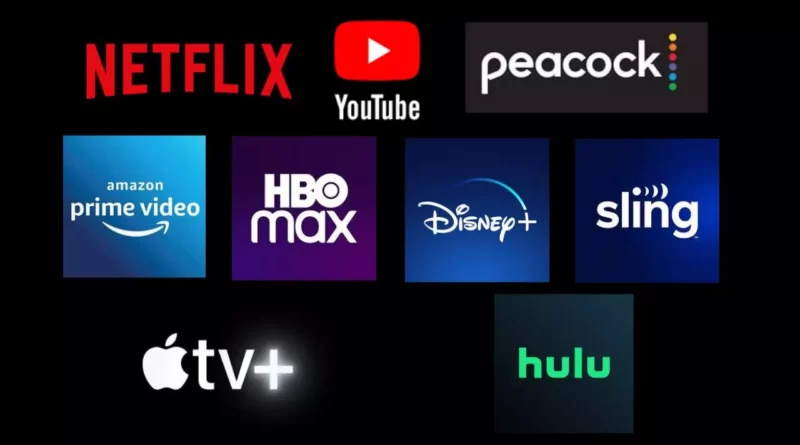

In [36]:
ott_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23362 entries, 0 to 3181
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  23362 non-null  object 
 1   title               23362 non-null  object 
 2   type                23362 non-null  object 
 3   description         23167 non-null  object 
 4   release_year        23362 non-null  int64  
 5   age_certification   11381 non-null  object 
 6   runtime             23362 non-null  int64  
 7   seasons             23362 non-null  float64
 8   imdb_score          20804 non-null  float64
 9   imdb_votes          20744 non-null  float64
 10  tmdb_popularity     22642 non-null  float64
 11  tmdb_score          20362 non-null  float64
 12  genre               23362 non-null  object 
 13  production_country  23362 non-null  object 
 14  streaming_platform  23362 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 2.9+ 

In [37]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,8.6,467766.0,27.611,8.261,drama,US,[amazon_prime_video]
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,7.8,60933.0,9.013,7.357,comedy,US,[amazon_prime_video]
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,7.8,60244.0,14.759,7.433,drama,US,"[amazon_prime_video, paramount+]"
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,8.5,1149.0,15.424,7.600,comedy,US,[amazon_prime_video]
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,0.0,7.8,32210.0,12.400,7.400,western,US,"[amazon_prime_video, paramount+]"


## The Language of Cinema

### Could be possible that certain words appear more frequently in movie titles, and are considered more powerful or appropriate for a title? 

By analyzing the frequency of words, we can also identify whether certain words are more commonly used in titles, and gain insights into any patterns or trends in the data. 

In [38]:
ott_content['title'] = ott_content['title'].astype('str')

In [39]:
title_corpus = ' '.join(ott_content['title'])

In [40]:
from wordcloud import WordCloud, STOPWORDS

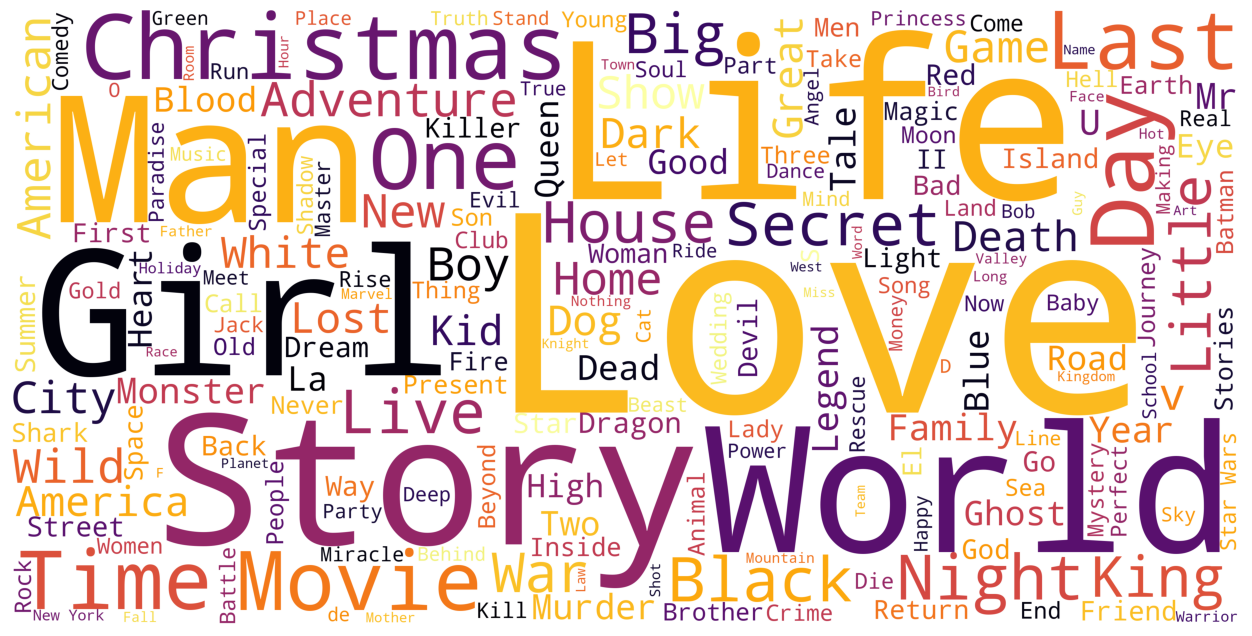

In [41]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000,  colormap='inferno').generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [42]:
# !pip3 install stylecloud

In [43]:
import stylecloud

### <b>Are production houses more likely to produce content about certain topics? Well, let's find out</b>

In [44]:
ott_content['description'] = ott_content['description'].astype('str')

In [45]:
description_corpus = ' '.join(ott_content['description'])

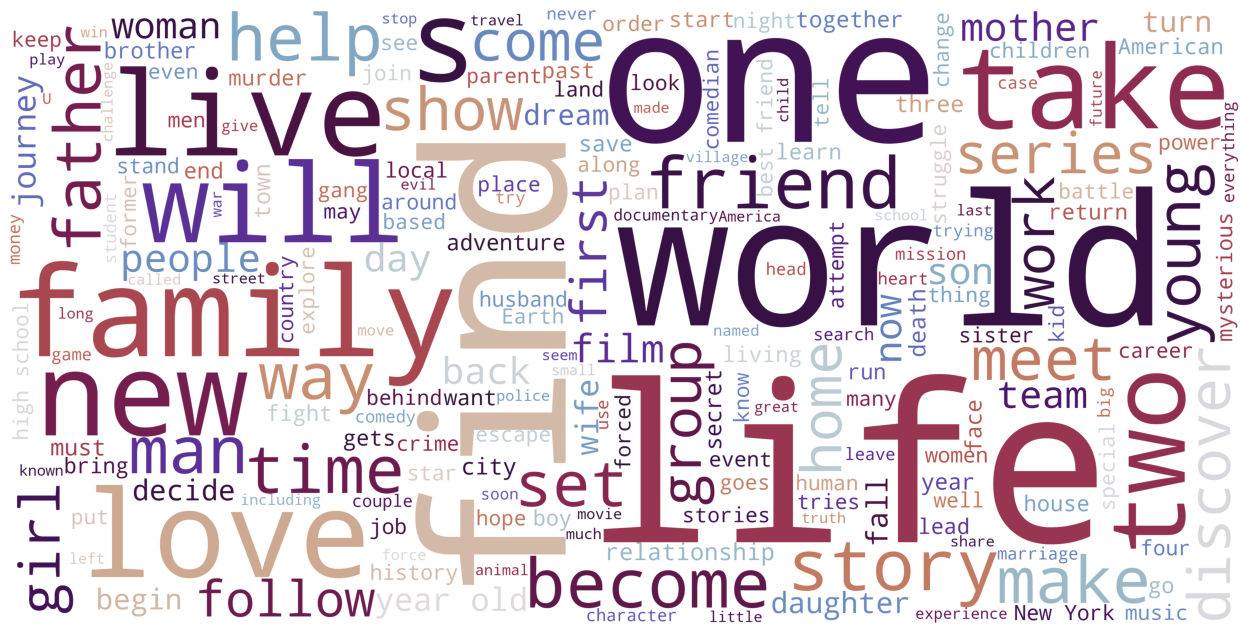

In [46]:
description_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000,  colormap='twilight_shifted').generate(description_corpus)
plt.figure(figsize=(16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

### <b>Production houses are more likely to create content that revolves around life, world, family, and love.</b>

In [47]:
ott_content.release_year.value_counts()

2021    2510
2020    2134
2019    2013
2022    1937
2018    1778
        ... 
1903       1
1912       1
1909       1
1913       1
1901       1
Name: release_year, Length: 118, dtype: int64

In [48]:
ott_content[ott_content['release_year']<= 1950].shape

(1211, 15)

In [49]:
ott_post_2000 = ott_content[ott_content['release_year']>=2000]

In [50]:
ott_post_2000.shape

(18973, 15)

## Content on the Internet

In [51]:
year_on_year = ott_post_2000.groupby('type')['release_year'].value_counts().unstack().fillna(0).loc[['MOVIE','SHOW']].cumsum(axis=0).T

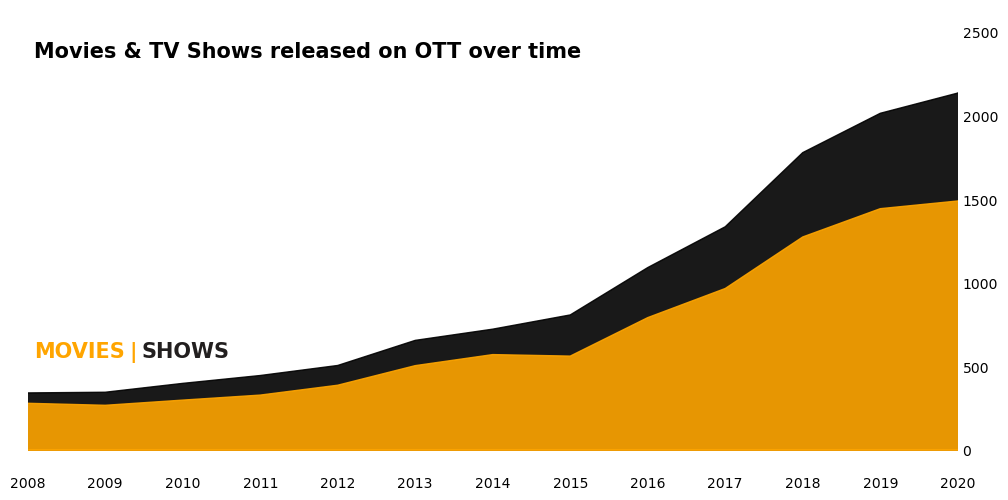

In [52]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
# color = ["black", "red"]
color = ["black","orange"]

for i, mtv in enumerate(ott_post_2000['type'].value_counts().index[::-1]):
    mtv_rel = year_on_year[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color = color[i], label = mtv, alpha = 0.9)
    
ax.yaxis.tick_right()

ax.axhline(y = 0, color = 'orange', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020) # setting limits on year
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.80, 'Movies & TV Shows released on OTT over time', fontsize=15, fontweight='bold', fontfamily='sans serif')

fig.text(0.13,0.3,"MOVIES", fontweight="bold", fontfamily='sans serif', fontsize=15, color='orange')
fig.text(0.21,0.3,"|", fontweight="bold", fontfamily='sans serif', fontsize=15, color='orange')
fig.text(0.22,0.3,"SHOWS", fontweight="bold", fontfamily='sans serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

In [53]:
ott_content.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,8.6,467766.0,27.611,8.261,drama,US,[amazon_prime_video]
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,7.8,60933.0,9.013,7.357,comedy,US,[amazon_prime_video]
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,7.8,60244.0,14.759,7.433,drama,US,"[amazon_prime_video, paramount+]"
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,8.5,1149.0,15.424,7.600,comedy,US,[amazon_prime_video]
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,0.0,7.8,32210.0,12.400,7.400,western,US,"[amazon_prime_video, paramount+]"


In [54]:
top_genres = ott_content[ott_content['release_year']>=1980]

In [55]:
genre_year = top_genres.groupby(['release_year','genre'])['runtime'].mean().unstack().fillna(0)

In [56]:
genre_year.columns

Index(['', 'action', 'animation', 'comedy', 'crime', 'documentation', 'drama',
       'european', 'family', 'fantasy', 'history', 'horror', 'music',
       'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western'],
      dtype='object', name='genre')

In [57]:
genre_year.drop(columns = [''], inplace = True)

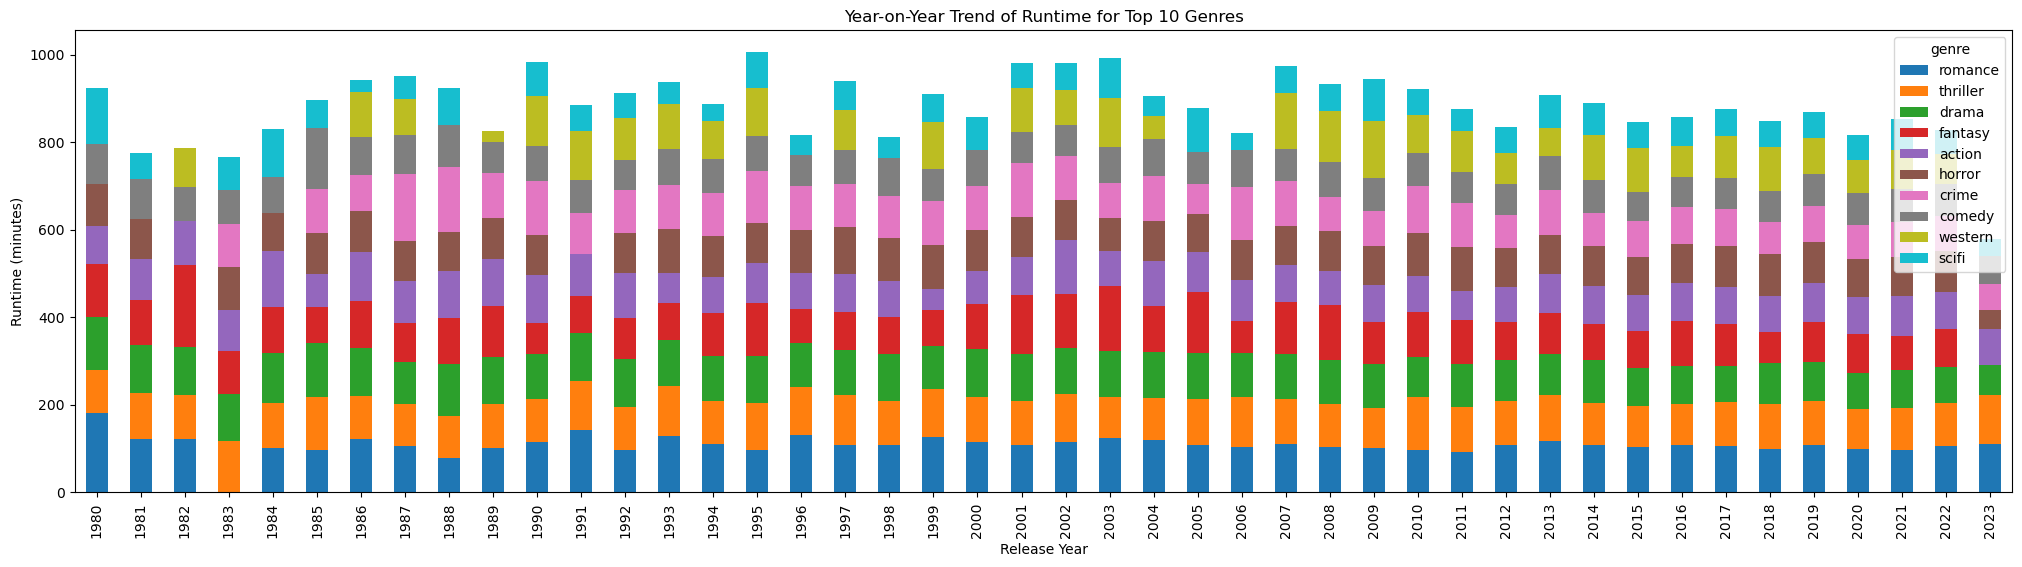

In [58]:
# Calculate the total runtime for each genre across all years
genre_total = genre_year.sum().sort_values(ascending=False)

# Select only the top 10 genres
top_10_genres = genre_total[:10].index

# Filter the data by the top 10 genres
genre_year_top_10 = genre_year[top_10_genres]

# Create a stacked bar chart
genre_year_top_10.plot(kind='bar', stacked=True, figsize=(25, 6))

plt.title('Year-on-Year Trend of Runtime for Top 10 Genres')
plt.xlabel('Release Year')
plt.ylabel('Runtime (minutes)');

# Inference:

In [59]:
shows = ott_content[ott_content['type'] == 'SHOW'].copy().reset_index()

In [60]:
shows.drop(['index'],axis = 1, inplace = True)

In [61]:
shows = shows[shows['release_year']>=1980]

In [62]:
shows['seasons'] = shows['seasons'].astype('int')

In [63]:
shows_runtime = shows.groupby(['release_year','genre'])['seasons'].mean().unstack().fillna(0)

In [64]:
shows_runtime.drop(columns = [''], axis = 1, inplace = True)

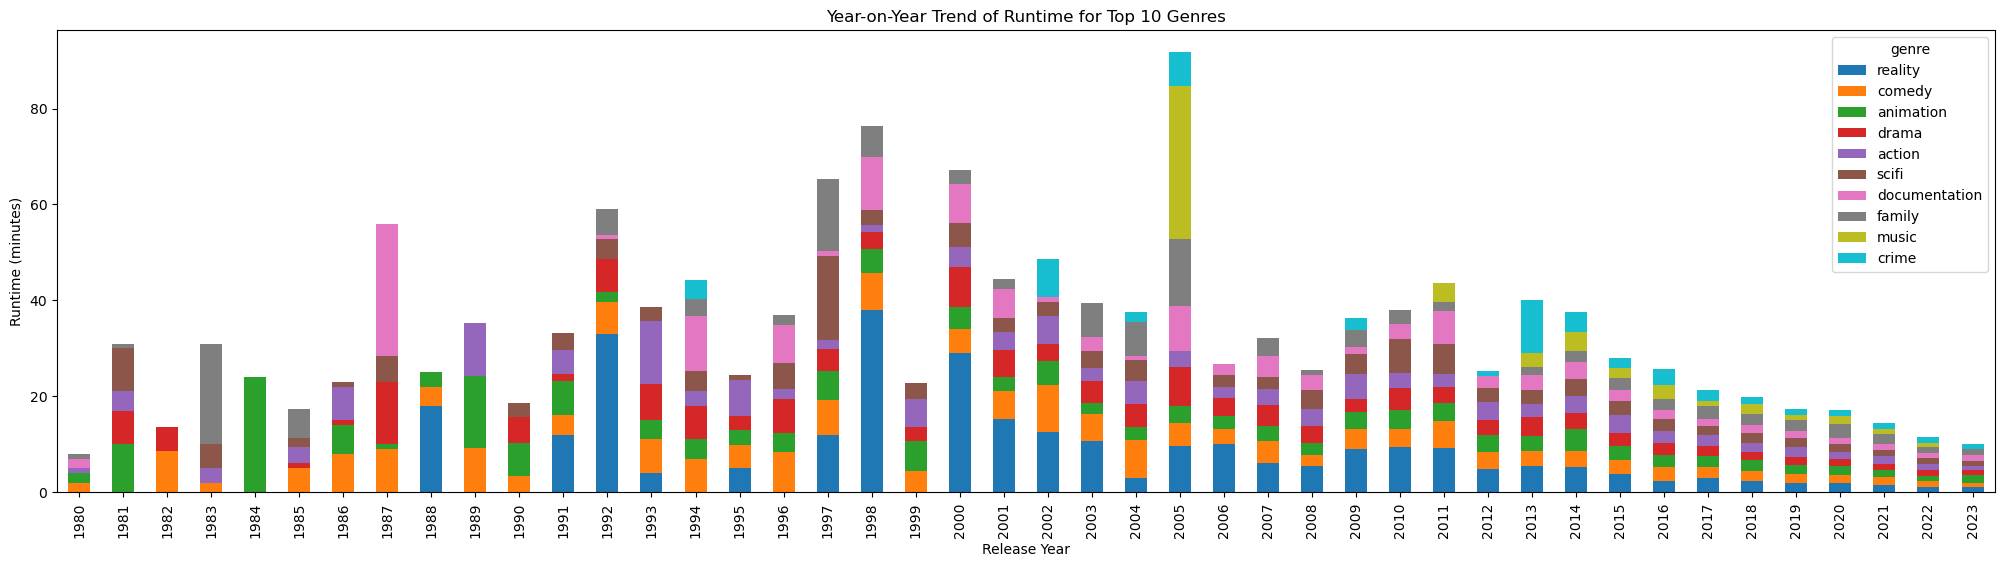

In [65]:
seasons_trend = shows_runtime.sum().sort_values(ascending = False)
top_10_seasons = seasons_trend[:10].index
seasons_top_10 = shows_runtime[top_10_seasons]
seasons_top_10.plot(kind='bar', stacked=True, figsize=(25, 6))
plt.title('Year-on-Year Trend of Runtime for Top 10 Genres')
plt.xlabel('Release Year')
plt.ylabel('Runtime (minutes)');

# Inference:

In [68]:
ott_content.head(2)

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,8.6,467766.0,27.611,8.261,drama,US,[amazon_prime_video]
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,7.8,60933.0,9.013,7.357,comedy,US,[amazon_prime_video]
